# Clustering Analisys:

The purpose of this notebook is documenting the process of extract information from the text of the database. 

This is the 8th notebook, so it is building on top of the cleaning, processing,  EDA, text processing and feature engineering processes

The main tasks conducted in this notebook are:
* extract important features and trends from the text;


## Load database

In [ ]:
#REquired libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# To load a file into colab:
import io
import os
from datetime import datetime

# For the plots:
import matplotlib.pyplot       as plt
import seaborn                 as sns
import plotly.express as px
import plotly.graph_objs as go
import time

In [ ]:
import sklearn.cluster as cluster
import time

import umap
import hdbscan
import seaborn as sns
from sklearn import metrics

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

### Pickle Files into Jupyter


In [ ]:
%%time
# To save as Pickle format:
bdf.to_pickle("./placetopayDB3_pickle")

In [ ]:
%%time
#And then when you need to restart your notebook you can simply read directly from pickle:
bd = pd.read_pickle("./placetopayDB3_pickle")
# If the file is very large the pickle file will be compressed with the parameter compression = 'gzip'.

### CSV into jupyter from local folder:

In [ ]:
cd ../Inferencia y recomendacion - EGM

/home/jovyan/work/PROJECT/Inferencia y recomendacion - EGM


In [ ]:
ls

drive/  sample_data/


In [ ]:
%%time
FileName = 'placetopayDB3.csv'
from csv import reader
opened_file = open(FileName) # File path if it fails it might be necessary to add encoding = "utf-8"
read_file = reader(opened_file,delimiter=',')
read_file

In [ ]:
Sample = pd.read_csv( FileName, nrows = 10) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

### Feather file into Jupyter

In [ ]:
%%time
import feather
FeatherFileName = '/placetopayDB3.ftr'

# To read feather-format:
bd = pd.read_feather(FeatherFilePath + FeatherFileName, columns=None, use_threads=True)
#bd = feather.read_dataframe(FilePath) # do the same, alternatively

In [ ]:
# Load the database to start exploratory analysis:
%%time
FileName = 'placetopayDB3.csv'
ChunkSize = 10 ** 5

#https://pythonspeed.com/articles/chunking-pandas/
#for chunk in pd.read_csv(FileName, chunksize=ChunkSize):
#    process(chunk)

DataChunk = pd.read_csv(FileName, chunksize=100000, sep=',', encoding='utf-8', usecols = chosen_cols) 
dfList = []
for chunk in DataChunk:
    dfList.append(chunk)
    print(chunk.shape, type(chunk))
    del chunk                       # You have to liberate memory, otherwise, it will crash the kernel
bd = pd.concat(dfList,sort=False)   # You can also convert to dataframe and process inside the for loop.
del DataChunk                       # You have to liberate memory, otherwise, it will crash the kernel%%time
# Dataset is now stored in a Pandas Dataframe

### Pickle files into Google Drive:

In [ ]:
from google.colab import drive
import pickle
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%time
DATA_PATH = "/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/placetopayDB4_pickle"
infile = open(DATA_PATH,'rb')
bd = pickle.load(infile)
bd.shape

CPU times: user 7.31 s, sys: 2.95 s, total: 10.3 s
Wall time: 30.9 s


### CSV into colab from Google Drive:

In [ ]:
# Para usar Google Drive, (Solo si se ejecuta desde Google Drive):
from google.colab import drive
drive.mount('/content/drive')

# after that:
# <--- Refresh mounted Drive
# <--- Look for file and get the path link

Mounted at /content/drive


In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/merchants_cluster.csv'
Merchants = pd.read_csv(FilePath) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

In [ ]:
Merchants.head()

,Unnamed: 0,merchant_id,transaction_id,Money,isic_division_name,merchant_address_city,merchant_classification,merchant_enabled,site_category,site_channel,Ret_February,Ret_March,Ret_April,Ret_May,Ret_June,Ret_July,Ret_August,Ret_September,Ret_October,Ret_November,Retention_class,age,cluster
0,0,CO0000000009,23861,4.867349e+09,58-Actividades de edición,Medellin,B+,Activo,E-Commerce,POS,0.082375,0.072600,0.071534,0.062500,0.060814,0.070539,0.085288,0.028664,0.039340,0.092279,LOW,16,2
1,1,CO0000000017,614278,4.167965e+11,65-Seguros y fondos de pensiones,Bogota,A+,Activo,Recaudo,POS,0.048786,0.078010,0.076357,0.079877,0.075945,0.070228,0.080349,0.033742,0.047211,0.061047,LOW,17,1
2,2,CO0000000024,494789,4.557723e+11,65-Seguros y fondos de pensiones,Medellin,A+,Activo,Recaudo,POS,0.377219,0.488204,0.544396,0.520827,0.484785,0.479414,0.534211,0.214248,0.198630,0.229766,HIGH,16,1
3,3,CO0000000028,30551,6.890263e+10,85-Educación,Barranquilla,B+,Activo,Recaudo,INTERNET,0.127660,0.188393,0.196733,0.167780,0.162683,0.197387,0.168219,0.061439,0.068696,0.094787,MEDIUM,16,1
4,4,CO0000000046,110535,7.265268e+10,79-Agencias de viajes y operadores turísticos,Bogota,A,Activo,E-Commerce,INTERNET,0.119490,0.095806,0.070211,0.047524,0.070124,0.068168,0.066513,0.049593,0.060642,0.066366,LOW,16,1


In [ ]:
Merchants.shape

(571, 23)

In [ ]:
Merchants.columns

Index(['Unnamed: 0', 'merchant_id', 'transaction_id', 'Money',
       'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Ret_February', 'Ret_March', 'Ret_April', 'Ret_May',
       'Ret_June', 'Ret_July', 'Ret_August', 'Ret_September', 'Ret_October',
       'Ret_November', 'Retention_class', 'age', 'cluster'],
      dtype='object')

# Merchants Clusters


In [ ]:
merchants = pd.read_csv('../data/mechants_clustering.csv',encoding = "latin")
merchants['age'] = 2020-pd.to_datetime(merchants['merchant_created']).dt.year
merchants.drop(columns=['merchant_created','isic_section_name','Ret_January','Ret_mean'],inplace=True)
merchants.head()

,merchant_id,transaction_id,Money,isic_division_name,merchant_address_city,merchant_classification,merchant_enabled,site_category,site_channel,Ret_February,...,Ret_April,Ret_May,Ret_June,Ret_July,Ret_August,Ret_September,Ret_October,Ret_November,Retention_class,age
0,CO0000000009,23861,4.867349e+09,58-Actividades de edición,Medellin,B+,Activo,E-Commerce,POS,0.082375,...,0.071534,0.062500,0.060814,0.070539,0.085288,0.028664,0.039340,0.092279,LOW,16
1,CO0000000017,614278,4.167965e+11,65-Seguros y fondos de pensiones,Bogota,A+,Activo,Recaudo,POS,0.048786,...,0.076357,0.079877,0.075945,0.070228,0.080349,0.033742,0.047211,0.061047,LOW,17
2,CO0000000024,494789,4.557723e+11,65-Seguros y fondos de pensiones,Medellin,A+,Activo,Recaudo,POS,0.377219,...,0.544396,0.520827,0.484785,0.479414,0.534211,0.214248,0.198630,0.229766,HIGH,16
3,CO0000000028,30551,6.890263e+10,85-Educación,Barranquilla,B+,Activo,Recaudo,INTERNET,0.127660,...,0.196733,0.167780,0.162683,0.197387,0.168219,0.061439,0.068696,0.094787,MEDIUM,16
4,CO0000000046,110535,7.265268e+10,79-Agencias de viajes y operadores turísticos,Bogota,A,Activo,E-Commerce,INTERNET,0.119490,...,0.070211,0.047524,0.070124,0.068168,0.066513,0.049593,0.060642,0.066366,LOW,16


In [ ]:
dummie_merchant = pd.get_dummies(merchants,columns=['isic_division_name','merchant_address_city','merchant_classification','merchant_enabled','site_category','site_channel','Retention_class'])
dummie_merchant.head()

,merchant_id,transaction_id,Money,Ret_February,Ret_March,Ret_April,Ret_May,Ret_June,Ret_July,Ret_August,...,site_category_E-Commerce,site_category_NO-INFO,site_category_Recaudo,site_channel_INTERNET,site_channel_IVR,site_channel_NO-INFO,site_channel_POS,Retention_class_HIGH,Retention_class_LOW,Retention_class_MEDIUM
0,CO0000000009,23861,4.867349e+09,0.082375,0.072600,0.071534,0.062500,0.060814,0.070539,0.085288,...,1,0,0,0,0,0,1,0,1,0
1,CO0000000017,614278,4.167965e+11,0.048786,0.078010,0.076357,0.079877,0.075945,0.070228,0.080349,...,0,0,1,0,0,0,1,0,1,0
2,CO0000000024,494789,4.557723e+11,0.377219,0.488204,0.544396,0.520827,0.484785,0.479414,0.534211,...,0,0,1,0,0,0,1,1,0,0
3,CO0000000028,30551,6.890263e+10,0.127660,0.188393,0.196733,0.167780,0.162683,0.197387,0.168219,...,0,0,1,1,0,0,0,0,0,1
4,CO0000000046,110535,7.265268e+10,0.119490,0.095806,0.070211,0.047524,0.070124,0.068168,0.066513,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
clusterable_merchant = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=20,
    random_state=42,
).fit_transform(dummie_merchant.drop(columns=['merchant_id']))
pd.DataFrame(clusterable_merchant)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,11.845398,1.703952,6.085537,4.620896,3.533020,3.911709,5.773864,5.396497,5.336052,4.357125,5.945614,4.171293,4.943392,4.452776,6.568084,4.256555,5.390716,5.334925,5.886680,5.093393
1,12.638083,0.912444,8.320752,8.462421,4.866310,5.000008,5.003893,5.143099,5.615243,5.173290,5.685591,3.989409,4.405051,5.445153,6.920768,5.022761,5.013874,4.834038,5.961838,6.001144
2,12.587035,0.902116,8.289589,8.446320,4.840012,4.981092,5.062087,5.080800,5.639591,5.159277,5.689551,3.933449,4.403329,5.399574,6.910509,5.050443,5.038664,4.780943,5.955970,5.961401
3,12.529489,0.878365,8.251315,8.335944,4.817010,4.995065,5.116336,5.016249,5.660647,5.126044,5.707741,3.872533,4.399364,5.360742,6.901166,5.070725,5.081182,4.727664,5.955604,5.892238
4,12.546973,0.885232,8.261565,8.307907,4.811158,4.991868,5.109430,5.026652,5.661004,5.131640,5.704012,3.888923,4.395906,5.356236,6.907512,5.063907,5.081472,4.744441,5.952229,5.888512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,-1.083926,-0.860850,-2.018829,10.597602,2.126780,8.351711,6.479065,7.900508,7.367033,6.399257,5.350199,3.581447,6.206284,5.510036,5.329113,4.290572,5.394123,4.517986,5.732718,5.216231
567,-1.009605,-0.729484,-2.028724,10.411102,1.925291,8.148952,6.372212,7.740474,7.704141,6.223977,5.538715,3.894335,6.300342,4.598953,5.432768,4.111092,5.072299,4.680035,5.487180,5.225596
568,-1.034128,-0.881161,-1.968081,10.651942,2.075884,8.367202,6.472589,7.886305,7.384030,6.372560,5.398960,3.593658,6.249708,5.448965,5.312025,4.238465,5.384243,4.581660,5.794505,5.185921
569,-1.034087,-0.811835,-2.026276,10.491375,1.943223,8.262142,6.430387,7.756325,7.595622,6.277400,5.474955,3.799961,6.277453,4.997288,5.355068,4.134522,5.176174,4.640560,5.591875,5.255129


In [ ]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=50,
).fit_predict(clusterable_merchant)
labels

array([ 2,  1,  1,  1,  1,  3,  5,  4,  6,  1,  5,  3,  2,  3,  3,  3,  3,
        3,  6,  6,  2,  3,  1,  1,  2, -1,  6,  1,  2,  2,  2,  1,  4,  1,
        3,  5,  5,  4,  2,  1,  2,  5,  2,  6,  1,  3,  5,  4,  4,  2,  2,
        3,  3,  2,  1,  2,  2,  3,  4,  2,  2,  2,  2,  3,  3,  6,  1,  1,
        1,  2,  4,  3,  4,  5,  3,  1,  2,  1,  4,  3,  2,  3,  1,  4,  1,
        6,  2,  2,  1,  5,  6,  3,  4,  3,  6,  1,  1,  1,  6,  5,  3,  6,
        2,  6,  2,  2,  5,  4,  2,  1,  2,  5,  1,  5,  6,  5,  6,  2,  5,
        5,  4,  5,  5,  1,  4, -1,  6,  6,  0,  3,  2,  1,  5,  4,  5,  3,
        6,  6,  5,  3,  1,  6,  4,  1,  6,  5,  5,  6,  5,  3,  2,  1,  5,
        2,  2,  2,  3,  6,  2,  5,  2,  5,  1,  6,  6,  6,  5,  3,  6,  6,
        4,  4,  0,  3,  1,  5,  3,  5,  6,  5,  5,  2,  3,  4,  4,  6,  4,
       -1,  6,  4,  3,  5,  4,  1,  5,  1,  6,  2,  3,  2,  1,  1,  3,  5,
        1,  1,  3,  2, -1,  2,  6,  2,  1,  3,  1,  3,  6,  6,  6,  3,  6,
        0,  4,  6,  4,  6

In [ ]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

In [ ]:
merchant_cluster = pd.merge(merchants,pd.DataFrame(labels,columns=['cluster']),how='left',left_index=True,right_index=True)

In [ ]:
merchant_cluster.to_csv('../data/merchants_cluster.csv')

In [ ]:
metrics.silhouette_score(clusterable_merchant, labels)

0.74518967

# Payers Clusters


In [ ]:
payers = pd.read_csv('../data/payers.csv')
payers.drop(columns=['FirstPurchase','LastPurchase','ip_location_region_name'],inplace=True)
payers.head()

,transaction_payer_id,Purchases,TotalSpent,Money,recency,frequency,transaction_payer_document_type,ip_location_city,transaction_user_agent
0,AC01SW14B5,1,48900.0,48900.0,12.0,0.000000,No Info,Bogota,No Info
1,ABK9YOCHAS,1,112700.0,112700.0,19.0,0.000000,No Info,Bogota,No Info
2,A1S6?16335,3,127500.0,42500.0,104.0,12.666667,No Info,Bogota,No Info
3,ASEK3QVUIL,2,53500.0,26750.0,195.0,52.500000,No Info,Bogota,No Info
4,A7F8LGO9YQ,1,1353310.0,1353310.0,73.0,0.000000,No Info,Pereira,No Info


In [ ]:
cities = pd.DataFrame(payers['ip_location_city'].value_counts()).reset_index()
#cities.head()

In [ ]:
cities['perc'] = cities['ip_location_city']/len(payers)*100

In [ ]:
payers = pd.merge(payers,cities[['index','perc']],how='left',left_on='ip_location_city',right_on='index')
payers.drop(columns=['index','ip_location_city'],inplace=True)
payers

,transaction_payer_id,Purchases,TotalSpent,Money,recency,frequency,transaction_payer_document_type,transaction_user_agent,perc
0,AC01SW14B5,1,48900.0,48900.0,12.0,0.000000,No Info,No Info,27.034380
1,ABK9YOCHAS,1,112700.0,112700.0,19.0,0.000000,No Info,No Info,27.034380
2,A1S6?16335,3,127500.0,42500.0,104.0,12.666667,No Info,No Info,27.034380
3,ASEK3QVUIL,2,53500.0,26750.0,195.0,52.500000,No Info,No Info,27.034380
4,A7F8LGO9YQ,1,1353310.0,1353310.0,73.0,0.000000,No Info,No Info,1.225735
...,...,...,...,...,...,...,...,...,...
2430944,PPQU1UUX61,2,109300.0,54650.0,29.0,22.500000,No Info,No Info,27.034380
2430945,PJAS6R7AFX,1,80900.0,80900.0,85.0,0.000000,No Info,No Info,0.579815
2430946,P9AK57IH1E,2,67500.0,33750.0,11.0,92.000000,No Info,No Info,27.034380
2430947,PTP546FBH1,2,57800.0,28900.0,197.0,56.000000,No Info,No Info,27.034380


In [ ]:
for i,row in payers.iterrows():
    if 'Android' in row['transaction_user_agent']:
        payers.at[i,'device'] = 'Android'
    elif 'iPhone' in row['transaction_user_agent']:
        payers.at[i,'device'] = 'iPhone'
    elif 'Windows' in row['transaction_user_agent']:
        payers.at[i,'device'] = 'Windows'
    elif 'iPad' in row['transaction_user_agent']:
        payers.at[i,'device'] = 'iPad'
    elif 'Macintosh' in row['transaction_user_agent']:
        payers.at[i,'device'] = 'Macintosh'
    elif 'Linux x' in row['transaction_user_agent']:
        payers.at[i,'device'] = 'Linux'
    elif 'Java' in row['transaction_user_agent']:
        payers.at[i,'device'] = 'Java'
    else:
        payers.at[i,'device'] = 'NA'

payers['device'].unique()

array(['NA', 'Windows', 'iPhone', 'Android', 'Java', 'Macintosh', 'Linux',
       'iPad'], dtype=object)

In [ ]:
payers.drop(columns=['transaction_user_agent'],inplace=True)
#payers.head()

In [ ]:
dummie_payers = pd.get_dummies(payers,columns=['transaction_payer_document_type','device'])
dummie_payers.head()

,transaction_payer_id,Purchases,TotalSpent,Money,recency,frequency,perc,transaction_payer_document_type_CC,transaction_payer_document_type_CE,transaction_payer_document_type_CIP,...,transaction_payer_document_type_SSN,transaction_payer_document_type_TI,device_Android,device_Java,device_Linux,device_Macintosh,device_NA,device_Windows,device_iPad,device_iPhone
0,AC01SW14B5,1,48900.0,48900.0,12.0,0.000000,27.034380,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,ABK9YOCHAS,1,112700.0,112700.0,19.0,0.000000,27.034380,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,A1S6?16335,3,127500.0,42500.0,104.0,12.666667,27.034380,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ASEK3QVUIL,2,53500.0,26750.0,195.0,52.500000,27.034380,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,A7F8LGO9YQ,1,1353310.0,1353310.0,73.0,0.000000,1.225735,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import gc
del cities#, payers
gc.collect()

9208

In [ ]:
dummie_sample = dummie_payers.sample(1000000)
dummie_sample

,transaction_payer_id,Purchases,TotalSpent,Money,recency,frequency,perc,transaction_payer_document_type_CC,transaction_payer_document_type_CE,transaction_payer_document_type_CIP,...,transaction_payer_document_type_SSN,transaction_payer_document_type_TI,device_Android,device_Java,device_Linux,device_Macintosh,device_NA,device_Windows,device_iPad,device_iPhone
2333195,PBLGDC6GX8,1,320750.0,3.207500e+05,25.0,0.0,0.464387,1,0,0,...,0,0,0,0,0,0,0,1,0,0
483065,D44NZ5ODK7,2,739800.0,3.699000e+05,149.0,2.0,10.718119,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2222992,OKXHZDGQGQ,2,2296796.0,4.593592e+05,57.0,6.5,8.699812,1,0,0,...,0,0,0,0,0,0,0,1,0,0
489429,D5O9A5LZ4O,2,3320068.0,1.106689e+06,177.0,35.5,27.006120,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1012149,GI9UYPR3Q7,1,2359460.0,1.179730e+06,61.0,64.0,8.699812,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1798249,LPXNNNISDF,2,2558600.0,6.396500e+05,153.0,10.0,27.034380,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1654828,KSTK7KSMU0,1,390050.0,3.900500e+05,202.0,0.0,27.034380,1,0,0,...,0,0,0,0,0,0,0,0,0,1
323890,C18TIWWPLS,1,382422.0,3.824220e+05,195.0,0.0,0.661923,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1211036,HTCJ83C474,1,721300.0,3.606500e+05,16.0,0.0,27.006120,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
clusterable_payers = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=10,
    random_state=42,
).fit_transform(dummie_payers.drop(columns=['transaction_payer_id']))
pd.DataFrame(clusterable_payers)

NameError: name 'umap' is not defined

In [ ]:
labels = hdbscan.HDBSCAN(
    min_samples=1,
    min_cluster_size=50000,
).fit_predict(dummie_sample.drop(columns=['transaction_payer_id']))
np.unique(labels)

array([-1,  0,  1,  2,  3], dtype=int64)

In [ ]:
#payers 2430949
np.unique(labels)

array([-1,  0,  1,  2,  3], dtype=int64)

In [ ]:
metrics.silhouette_score(dummie_sample.drop(columns=['transaction_payer_id']), labels,random_state=42,sample_size=200000)

-0.1480203162144099

In [ ]:
payers_cluster = pd.merge(payers,pd.DataFrame(labels,columns=['cluster']),how='left',left_index=True,right_index=True)

In [ ]:
payers_cluster.to_csv('../data/payers_cluster.csv')

In [ ]:
payers_cluster

,transaction_payer_id,Purchases,TotalSpent,Money,recency,frequency,transaction_payer_document_type,perc,device,cluster
0,AC01SW14B5,1,48900.0,48900.0,12.0,0.000000,No Info,27.034380,NA,26
1,ABK9YOCHAS,1,112700.0,112700.0,19.0,0.000000,No Info,27.034380,NA,26
2,A1S6?16335,3,127500.0,42500.0,104.0,12.666667,No Info,27.034380,NA,52
3,ASEK3QVUIL,2,53500.0,26750.0,195.0,52.500000,No Info,27.034380,NA,50
4,A7F8LGO9YQ,1,1353310.0,1353310.0,73.0,0.000000,No Info,1.225735,NA,0
...,...,...,...,...,...,...,...,...,...,...
2430944,PPQU1UUX61,2,109300.0,54650.0,29.0,22.500000,No Info,27.034380,NA,50
2430945,PJAS6R7AFX,1,80900.0,80900.0,85.0,0.000000,No Info,0.579815,NA,26
2430946,P9AK57IH1E,2,67500.0,33750.0,11.0,92.000000,No Info,27.034380,NA,50
2430947,PTP546FBH1,2,57800.0,28900.0,197.0,56.000000,No Info,27.034380,NA,50


## Cluster Interpretation

In [ ]:
with pd.option_context('display.float_format', lambda x: '%.6f' % x):
    display(payers_cluster.groupby(['cluster'])['Purchases'].describe().sort_values(by=['min'],ascending=True))

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
-1,639148.000000,5.533474,5.552307,1.000000,2.000000,4.000000,8.000000,70.000000
0,144869.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,130273.000000,3.459435,1.656751,1.000000,2.000000,3.000000,5.000000,9.000000
2,235695.000000,1.884499,0.721616,1.000000,1.000000,2.000000,2.000000,5.000000
3,347055.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,291206.000000,2.846095,1.650954,1.000000,2.000000,2.000000,4.000000,14.000000
5,150650.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,172285.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,104768.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000




---



---

#  Make graphics: Load tables

In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/mechants_clustering.csv'
Merchants2 = pd.read_csv(FilePath, sep=',', encoding='latin') 
Merchants2.shape

(571, 24)

In [ ]:
Merchants2.columns

Index(['merchant_id', 'merchant_created', 'transaction_id', 'Money',
       'isic_section_name', 'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Ret_January', 'Ret_February', 'Ret_March', 'Ret_April',
       'Ret_May', 'Ret_June', 'Ret_July', 'Ret_August', 'Ret_September',
       'Ret_October', 'Ret_November', 'Ret_mean', 'Retention_class'],
      dtype='object')

In [ ]:
Merchants2.head()

,merchant_id,merchant_created,transaction_id,Money,isic_section_name,isic_division_name,merchant_address_city,merchant_classification,merchant_enabled,site_category,site_channel,Ret_January,Ret_February,Ret_March,Ret_April,Ret_May,Ret_June,Ret_July,Ret_August,Ret_September,Ret_October,Ret_November,Ret_mean,Retention_class
0,CO0000000009,2/4/2004,23861,4.867349e+09,J-INFORMACIÓN Y COMUNICACIONES,58-Actividades de edición,Medellin,B+,Activo,E-Commerce,POS,0,0.082375,0.072600,0.071534,0.062500,0.060814,0.070539,0.085288,0.028664,0.039340,0.092279,0.066593,LOW
1,CO0000000017,6/27/2003,614278,4.167965e+11,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,Bogota,A+,Activo,Recaudo,POS,0,0.048786,0.078010,0.076357,0.079877,0.075945,0.070228,0.080349,0.033742,0.047211,0.061047,0.065155,LOW
2,CO0000000024,12/3/2004,494789,4.557723e+11,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,Medellin,A+,Activo,Recaudo,POS,0,0.377219,0.488204,0.544396,0.520827,0.484785,0.479414,0.534211,0.214248,0.198630,0.229766,0.407170,HIGH
3,CO0000000028,4/27/2004,30551,6.890263e+10,P-EDUCACIÓN,85-Educación,Barranquilla,B+,Activo,Recaudo,INTERNET,0,0.127660,0.188393,0.196733,0.167780,0.162683,0.197387,0.168219,0.061439,0.068696,0.094787,0.143378,MEDIUM
4,CO0000000046,7/27/2004,110535,7.265268e+10,N-ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y D...,79-Agencias de viajes y operadores turísticos,Bogota,A,Activo,E-Commerce,INTERNET,0,0.119490,0.095806,0.070211,0.047524,0.070124,0.068168,0.066513,0.049593,0.060642,0.066366,0.071444,LOW


In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/merchants.csv'
MerchAge = pd.read_csv(FilePath)

In [ ]:
MerchAge = pd.merge(MerchAge, Merchants[['merchant_id','age', 'cluster']], how="left", left_on='merchant_id', right_on='merchant_id')

In [ ]:
MerchAge.head()

,key_0,merchant_id,merchant_created,Age,No of transactions,Mean Trans. Amount,Total Trans. Amount,isic_section_name,isic_division_name,merchant_address_city,merchant_classification,merchant_enabled,site_category,site_channel,Retention_Q1,Retention_Q2,Retention_Q3,Ret_mean,Retention_class
0,0,CO0000000009,2004-02-04,6073.0,23861,2.039876e+05,4.867349e+09,J-INFORMACIÓN Y COMUNICACIONES,58-Actividades de edición,Medellin,B+,Activo,E-Commerce,POS,0.149276,0.169588,0.073330,0.130731,MEDIUM
1,1,CO0000000017,2003-06-27,6295.0,614278,6.785144e+05,4.167965e+11,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,Bogota,A+,Activo,Recaudo,POS,0.137848,0.132370,0.053940,0.108053,MEDIUM
2,2,CO0000000024,2004-12-03,5770.0,494789,9.211448e+05,4.557723e+11,K-ACTIVIDADES FINANCIERAS Y DE SEGUROS,65-Seguros y fondos de pensiones,Medellin,A+,Activo,Recaudo,POS,0.672632,0.596481,0.309106,0.526073,HIGH
3,3,CO0000000028,2004-04-27,5990.0,30551,2.255331e+06,6.890263e+10,P-EDUCACIÓN,85-Educación,Barranquilla,B+,Activo,Recaudo,INTERNET,0.239752,0.321900,0.110497,0.224050,MEDIUM
4,4,CO0000000046,2004-07-27,5899.0,110535,6.572821e+05,7.265268e+10,N-ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y D...,79-Agencias de viajes y operadores turísticos,Bogota,A,Activo,E-Commerce,INTERNET,0.080996,0.088191,0.092824,0.087337,LOW


In [ ]:
MerchAge.columns

Index(['key_0', 'merchant_id', 'merchant_created', 'Age', 'No of transactions',
       'Mean Trans. Amount', 'Total Trans. Amount', 'isic_section_name',
       'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Retention_Q1', 'Retention_Q2', 'Retention_Q3',
       'Ret_mean', 'Retention_class', 'age', 'cluster'],
      dtype='object')

## Statistical Description of each cluster:

In [ ]:
MerchAge.cluster.unique()

array([ 2,  1,  3,  5,  4,  6, -1,  0])

In [ ]:
MerchAge[MerchAge['cluster']==1].describe()

,key_0,Age,No of transactions,Mean Trans. Amount,Total Trans. Amount,Retention_Q1,Retention_Q2,Retention_Q3,Ret_mean,age,cluster
count,64.000000,64.000000,64.000000,6.400000e+01,6.400000e+01,64.000000,64.000000,64.000000,64.000000,64.000000,64.0
mean,195.843750,2552.234375,129136.218750,9.719816e+05,6.411875e+10,0.326900,0.341251,0.166163,0.278104,6.781250,1.0
std,151.747516,1697.426453,194981.991889,8.366671e+05,1.058136e+11,0.257287,0.223416,0.137179,0.194630,4.640979,0.0
min,1.000000,-43.000000,2876.000000,5.350471e+04,6.876384e+09,0.016635,0.022083,0.011379,0.037625,0.000000,1.0
25%,73.250000,1091.250000,13886.000000,3.265408e+05,1.010679e+10,0.111666,0.134962,0.065958,0.106406,3.000000,1.0
50%,168.000000,2176.000000,37105.000000,6.887932e+05,1.954505e+10,0.218159,0.291183,0.106528,0.215315,6.000000,1.0
75%,304.750000,4170.000000,142456.000000,1.426504e+06,6.984014e+10,0.566464,0.524722,0.268553,0.450890,11.000000,1.0
max,527.000000,6295.000000,779216.000000,3.792632e+06,5.222464e+11,0.840367,0.805851,0.749867,0.718665,17.000000,1.0


In [ ]:
MerchAge[MerchAge['cluster']==2].describe()

,key_0,Age,No of transactions,Mean Trans. Amount,Total Trans. Amount,Retention_Q1,Retention_Q2,Retention_Q3,Ret_mean,age,cluster
count,73.000000,73.000000,73.000000,7.300000e+01,7.300000e+01,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,202.780822,2493.438356,13377.958904,9.788376e+05,2.750382e+09,0.294935,0.306291,0.164318,0.255181,6.561644,2.0
std,147.607235,1599.251014,31237.929021,8.936803e+05,1.324084e+09,0.263386,0.224592,0.160840,0.206238,4.346091,0.0
min,0.000000,123.000000,573.000000,1.324119e+04,1.322385e+09,0.014205,0.017301,0.016502,0.017829,0.000000,2.0
25%,62.000000,923.000000,1623.000000,1.852359e+05,1.725239e+09,0.119190,0.143156,0.056911,0.114884,2.000000,2.0
50%,160.000000,2369.000000,4135.000000,7.911251e+05,2.288633e+09,0.189781,0.234783,0.090110,0.174728,6.000000,2.0
75%,332.000000,4170.000000,14657.000000,1.595210e+06,3.356242e+09,0.423573,0.449141,0.196429,0.310391,11.000000,2.0
max,538.000000,6073.000000,235647.000000,4.064892e+06,6.227403e+09,0.875000,0.795455,0.666667,0.769274,16.000000,2.0


In [ ]:
MerchAge[MerchAge['cluster']==3].describe()

,key_0,Age,No of transactions,Mean Trans. Amount,Total Trans. Amount,Retention_Q1,Retention_Q2,Retention_Q3,Ret_mean,age,cluster
count,76.000000,76.000000,76.000000,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,225.486842,2150.684211,4219.776316,1.241904e+06,7.973590e+08,0.185175,0.208089,0.123115,0.172126,5.644737,3.0
std,148.924186,1505.528162,9943.202157,1.469056e+06,2.166850e+08,0.175565,0.176577,0.135167,0.151079,4.136678,0.0
min,5.000000,95.000000,64.000000,1.174970e+04,5.144598e+08,0.000000,0.000000,0.000000,0.014945,0.000000,3.0
25%,88.500000,989.000000,457.750000,1.954614e+05,6.267084e+08,0.052644,0.075549,0.048996,0.063700,2.750000,3.0
50%,223.000000,1579.500000,875.000000,8.545993e+05,7.482650e+08,0.104356,0.167741,0.091707,0.147900,4.000000,3.0
75%,324.250000,3539.500000,3700.250000,1.608211e+06,9.768049e+08,0.265850,0.276849,0.131663,0.208965,9.250000,3.0
max,551.000000,5220.000000,71106.000000,9.615569e+06,1.230919e+09,0.643357,0.793103,0.792079,0.741509,14.000000,3.0


In [ ]:
MerchAge[MerchAge['cluster']==4].describe()

,key_0,Age,No of transactions,Mean Trans. Amount,Total Trans. Amount,Retention_Q1,Retention_Q2,Retention_Q3,Ret_mean,age,cluster
count,76.000000,76.000000,76.000000,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000,76.0
mean,274.500000,1633.894737,1728.868421,9.625756e+05,3.264756e+08,0.156465,0.165128,0.109414,0.143669,4.236842,4.0
std,132.536938,1248.471691,2273.087787,1.287271e+06,7.913506e+07,0.181265,0.183610,0.122145,0.150400,3.393596,0.0
min,7.000000,78.000000,44.000000,2.627399e+04,2.086175e+08,0.000000,0.000000,0.000000,0.000000,0.000000,4.0
25%,183.750000,785.000000,249.500000,1.359284e+05,2.558612e+08,0.036814,0.033066,0.030508,0.035827,2.000000,4.0
50%,285.000000,1186.000000,602.500000,5.951366e+05,3.252239e+08,0.087610,0.085721,0.066667,0.084956,3.000000,4.0
75%,365.000000,2186.500000,2267.750000,1.168067e+06,3.883182e+08,0.191892,0.235577,0.136632,0.211279,6.000000,4.0
max,524.000000,4795.000000,9807.000000,6.279636e+06,4.777628e+08,0.738786,0.750000,0.533333,0.601566,13.000000,4.0


In [ ]:
MerchAge[MerchAge['cluster']==5].describe()

,key_0,Age,No of transactions,Mean Trans. Amount,Total Trans. Amount,Retention_Q1,Retention_Q2,Retention_Q3,Ret_mean,age,cluster
count,107.000000,107.000000,107.000000,1.070000e+02,1.070000e+02,107.000000,107.000000,107.000000,107.000000,107.000000,107.0
mean,326.878505,1406.934579,169.850467,7.636517e+05,2.243726e+07,0.121131,0.114189,0.093865,0.109729,3.607477,5.0
std,165.998790,1331.546131,604.669718,1.149580e+06,1.508735e+07,0.181270,0.174285,0.143018,0.139673,3.672326,0.0
min,6.000000,45.000000,3.000000,3.600000e+03,4.884540e+06,0.000000,0.000000,0.000000,0.000000,0.000000,5.0
25%,170.500000,362.500000,19.000000,1.296662e+05,9.092136e+06,0.000000,0.000000,0.000000,0.000000,1.000000,5.0
50%,340.000000,922.000000,46.000000,4.141666e+05,1.905166e+07,0.000000,0.000000,0.012926,0.055556,2.000000,5.0
75%,482.500000,2377.500000,118.500000,8.485700e+05,3.023455e+07,0.217647,0.188235,0.147186,0.152446,6.000000,5.0
max,562.000000,4965.000000,6119.000000,7.274124e+06,5.959424e+07,0.705128,0.750000,0.600000,0.553241,13.000000,5.0


In [ ]:
MerchAge[MerchAge['cluster']==6].describe()

,key_0,Age,No of transactions,Mean Trans. Amount,Total Trans. Amount,Retention_Q1,Retention_Q2,Retention_Q3,Ret_mean,age,cluster
count,88.000000,88.000000,88.000000,8.800000e+01,8.800000e+01,88.000000,88.000000,88.000000,88.000000,88.000000,88.0
mean,278.556818,1636.170455,300.272727,1.291372e+06,1.268143e+08,0.122542,0.129833,0.076485,0.109620,4.215909,6.0
std,148.149184,1251.709996,410.442703,1.507997e+06,3.992724e+07,0.164828,0.143207,0.094269,0.113372,3.374852,0.0
min,8.000000,17.000000,10.000000,5.916910e+04,6.427080e+07,0.000000,0.000000,0.000000,0.000000,0.000000,6.0
25%,161.500000,661.000000,86.000000,2.984723e+05,9.213864e+07,0.005962,0.000000,0.000000,0.035916,2.000000,6.0
50%,276.500000,1208.000000,149.500000,7.828161e+05,1.238441e+08,0.076923,0.100562,0.039038,0.082728,3.000000,6.0
75%,398.500000,2354.500000,392.500000,1.734679e+06,1.571712e+08,0.170388,0.177976,0.111814,0.131938,6.000000,6.0
max,560.000000,4795.000000,2524.000000,9.447263e+06,1.991816e+08,0.875000,0.590909,0.428571,0.571455,13.000000,6.0


## Plotting

Subplots with Shared X-Axes
https://plotly.com/python/subplots/
https://medium.com/@maxbade/joyplots-ridgeline-plots-with-joypy-in-python-694e3e8e7ffc

In [ ]:
#Plot Frequency distributions of each new attributes of merchants
#for i, column in enumerate(['Age', 'No of transactions', 'Mean Trans. Amount', 'Total Trans. Amount', 'Ret_mean', 'merchant_classification', 'site_category', 'site_channel']):
plt.figure(figsize=(10,10))
column = 'Age'
for cluster in MerchAge.cluster.unique():
  sns.distplot(MerchAge[MerchAge['cluster']==cluster][column], bins = 20, label = cluster).set_title('Age by cluster') #alpha = 0.5,
plt.legend()
plt.show()
#sns.distplot(a=None, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None, x=None)

TypeError: ignored

<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

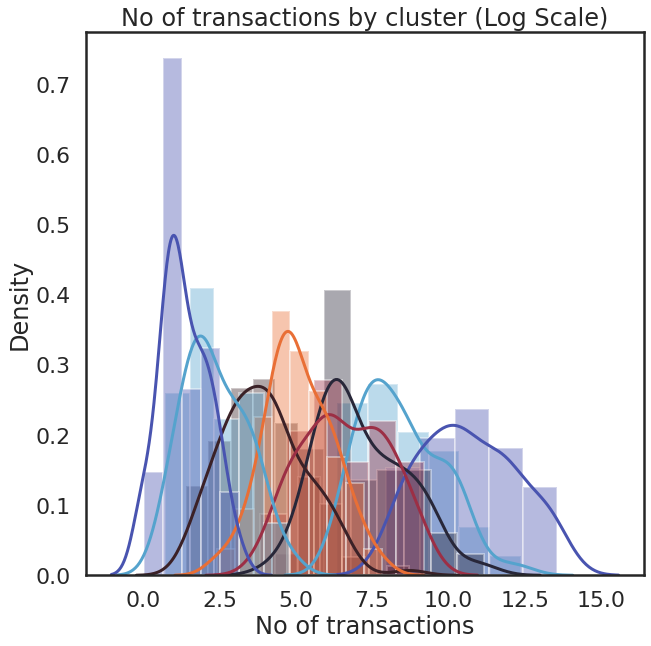

In [ ]:
plt.figure(figsize=(10,10))
column = 'No of transactions'
for cluster in MerchAge.cluster.unique():
  sns.distplot((np.log(MerchAge[MerchAge['cluster']==cluster][column]+1)), label = cluster).set_title('No of transactions by cluster (Log Scale)') 
#plt.legend()
#plt.show()


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

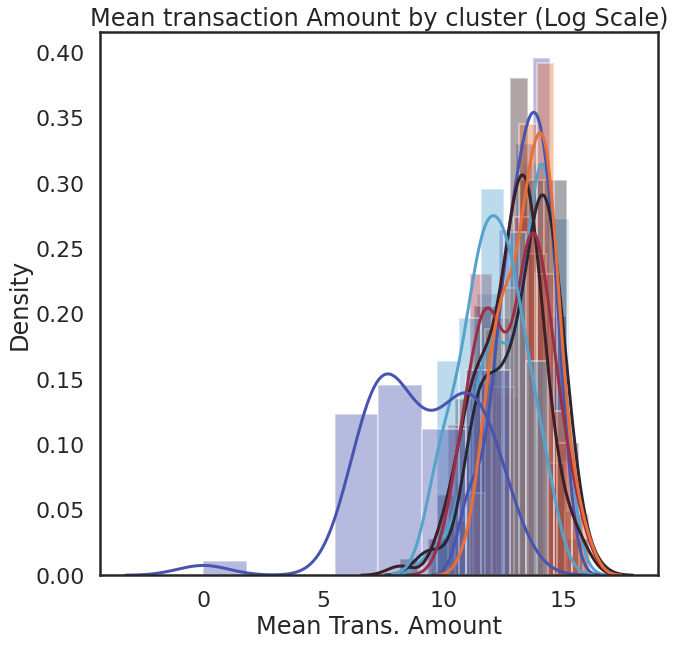

In [ ]:
plt.figure(figsize=(10,10))
column = 'Mean Trans. Amount'
for cluster in MerchAge.cluster.unique():
  sns.distplot((np.log(MerchAge[MerchAge['cluster']==cluster][column]+1)), label = cluster).set_title('Mean transaction Amount by cluster (Log Scale)') 


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

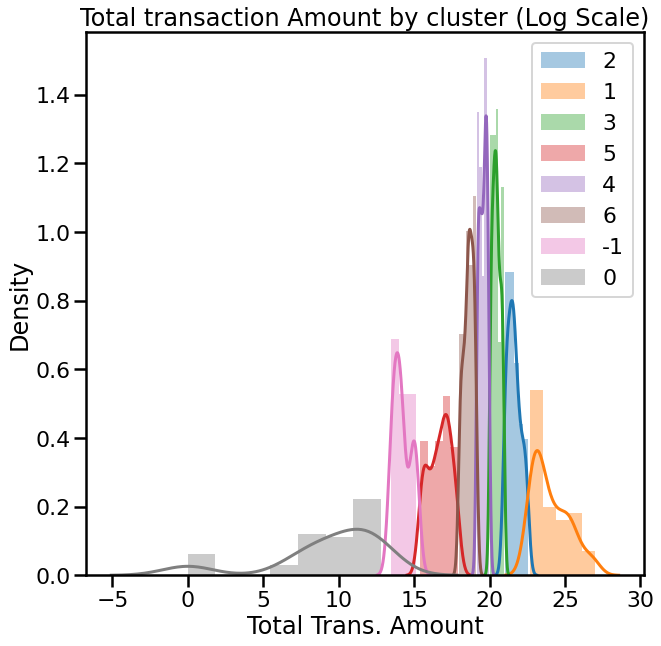

In [ ]:
plt.figure(figsize=(10,10))
column = 'Total Trans. Amount'
for cluster in MerchAge.cluster.unique():
  sns.distplot((np.log(MerchAge[MerchAge['cluster']==cluster][column]+1)), label = cluster).set_title('Total transaction Amount by cluster (Log Scale)') 
plt.legend()
plt.show()

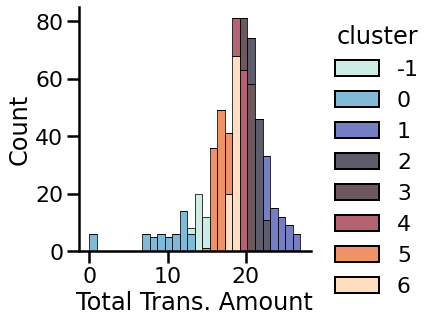

In [ ]:
sns.displot( data=MerchAge, x=np.log(MerchAge['Total Trans. Amount'] +1), hue='cluster', multiple="stack", palette = 'icefire')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/di

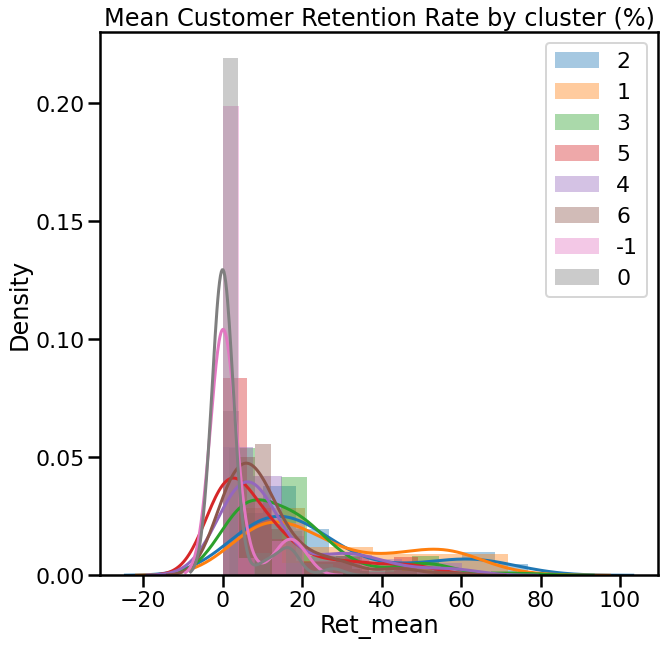

In [ ]:
plt.figure(figsize=(10,10))
column = 'Ret_mean'
for cluster in MerchAge.cluster.unique():
  sns.distplot(100*MerchAge[MerchAge['cluster']==cluster][column], label = cluster).set_title('Mean Customer Retention Rate by cluster (%)') 
plt.legend()
plt.show()

Text(0.5, 1.0, 'Merchant Classification by cluster')

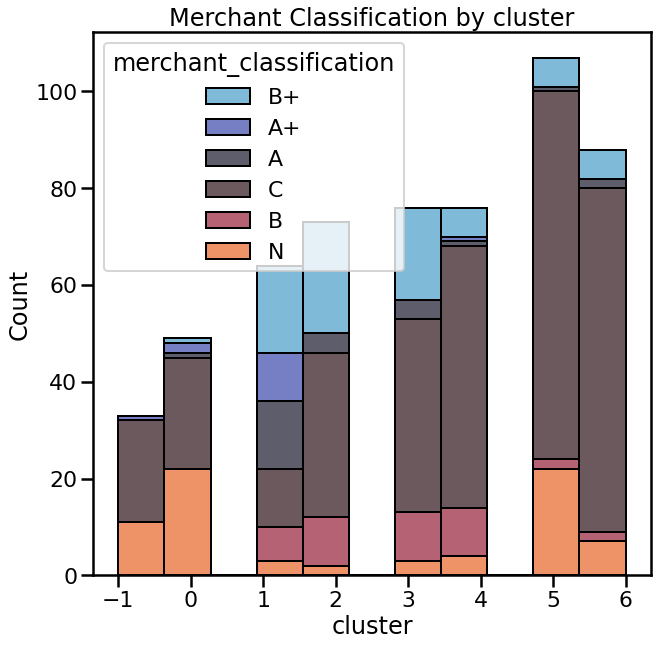

In [ ]:
plt.figure(figsize=(10,10))
g = sns.histplot(MerchAge, x='cluster', hue="merchant_classification", multiple="stack", label='merchant_classification', palette = 'icefire')
g.set_title('Merchant Classification by cluster')

#g.set((xlabel = 'Credibility Ranking\n ← Low       High  →', ylabel = 'Percent of Video Watched [%]'))

# title
#new_title = 'My title'
#g._legend.set_title(new_title)

#new_labels = ['label 1', 'label 2']
#for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
#sns.plt.legend()
#sns.plt.show()


Text(0.5, 1.0, 'Site Category by cluster')

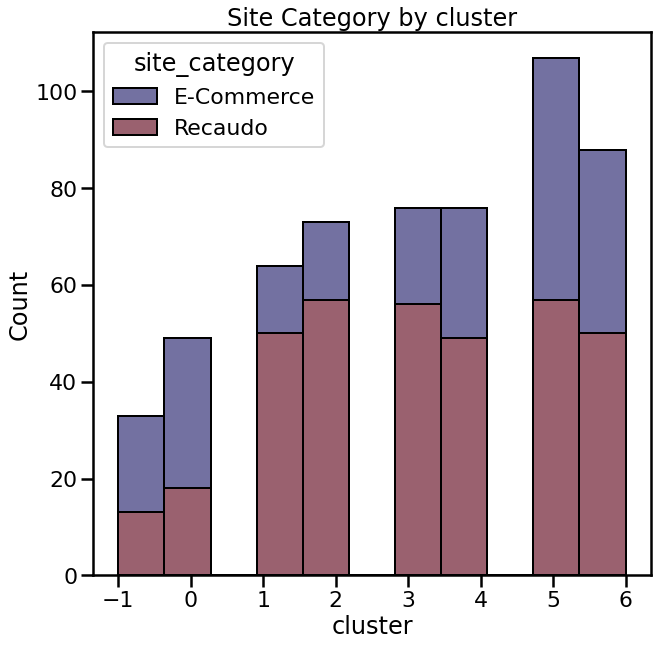

In [ ]:
plt.figure(figsize=(10,10))
g = sns.histplot(MerchAge, x='cluster', hue="site_category", multiple="stack", palette = 'icefire')
g.set_title('Site Category by cluster')

Text(0.5, 1.0, 'Site channel by cluster')

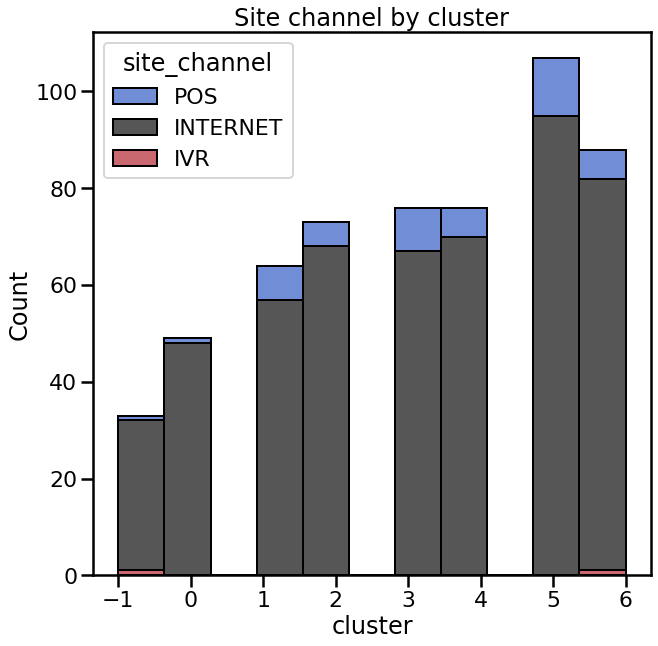

In [ ]:
plt.figure(figsize=(10,10))
g = sns.histplot(MerchAge, x='cluster', hue="site_channel", multiple="stack", palette = 'icefire')
g.set_title('Site channel by cluster')

Text(0.5, 1.0, 'Customer Retention by cluster')

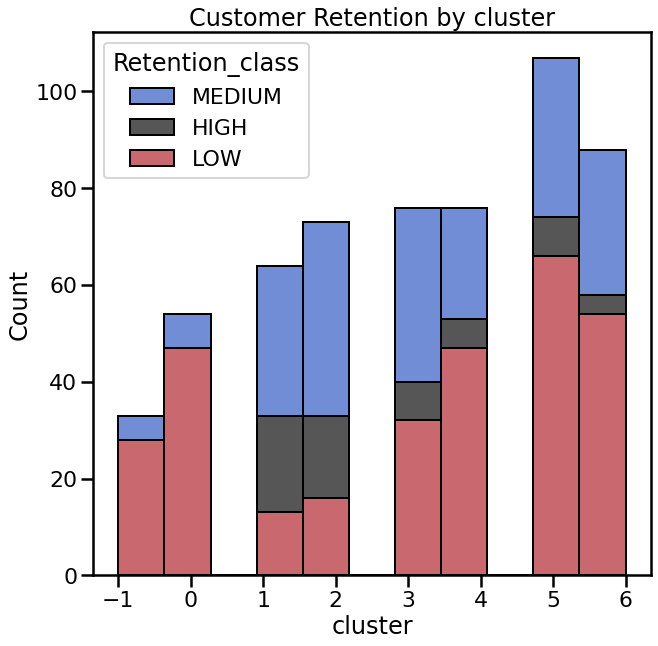

In [ ]:
plt.figure(figsize=(10,10))
g = sns.histplot(MerchAge, x='cluster', hue="Retention_class", multiple="stack", palette = 'icefire')
g.set_title('Customer Retention by cluster')



---



---



## Merchant Clusters

In [ ]:
Merchants.columns

Index(['Unnamed: 0', 'merchant_id', 'transaction_id', 'Money',
       'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Ret_February', 'Ret_March', 'Ret_April', 'Ret_May',
       'Ret_June', 'Ret_July', 'Ret_August', 'Ret_September', 'Ret_October',
       'Ret_November', 'Retention_class', 'age', 'cluster'],
      dtype='object')

In [ ]:
Merchants.cluster.unique()

array([ 2,  1,  3,  5,  4,  6, -1,  0])

In [ ]:
type(Merchants.cluster[0])

numpy.int64

TypeError: ignored

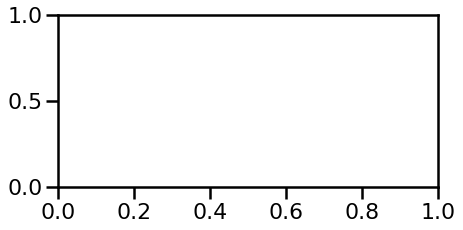

In [ ]:
plt.figure(figsize=(15,45))
for i, column in enumerate(Merchants.columns):
  plt.subplot(12, 2, i+1)
  
  #sns.histplot(MerchAge, x=column, hue=cluster, multiple="stack", label = column).set_title(column)
  
  #Merchants[column].hist(bins = 20, alpha = 0.5, color = 'g' , label = column).set_title(column)

  #if column == 'transaction_user_agent':
    #plt.xticks(rotation=90)

plt.legend()
plt.show()

<Figure size 1800x1800 with 0 Axes>

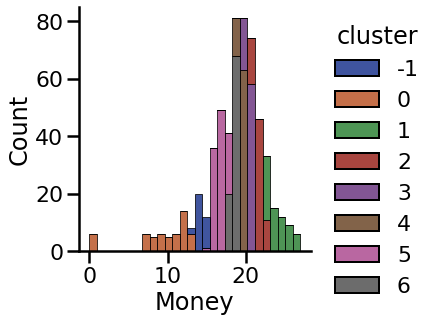

In [ ]:
plt.figure(figsize=(25,25))
sns.displot( data=Merchants, x=np.log(Merchants['Money'] +1), hue='cluster', multiple="stack", palette = 'icefire')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



ValueError: ignored

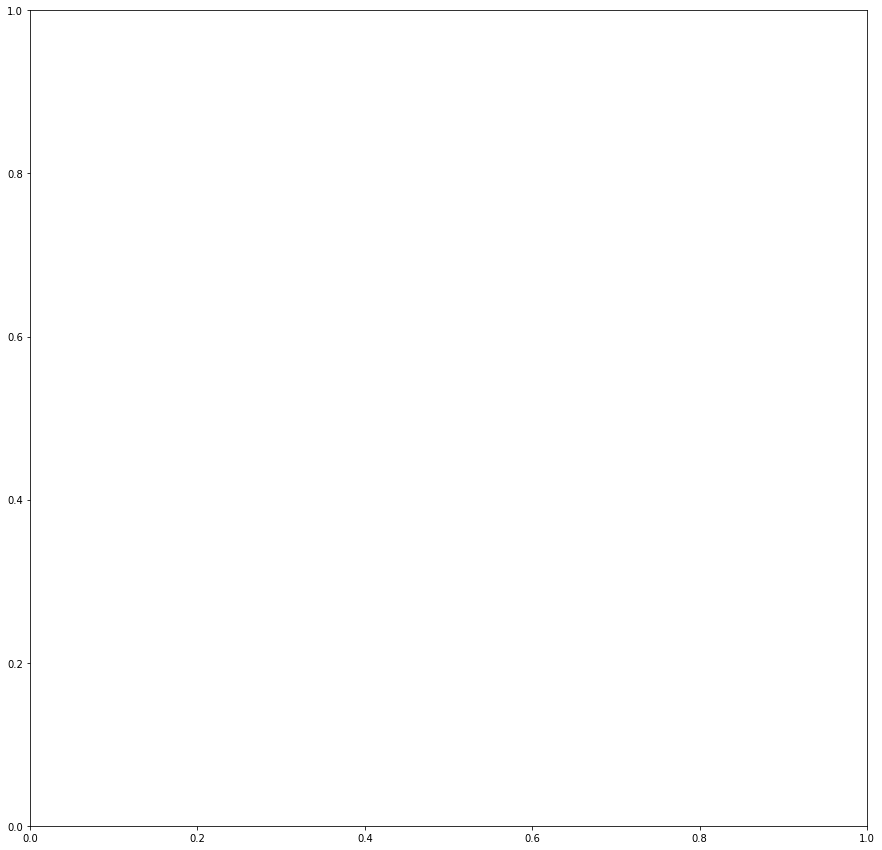

In [ ]:
plt.figure(figsize=(15,15))

sns.displot( data=Merchants, x='merchant_address_city', hue='cluster', palette = 'icefire')

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

<Figure size 1080x1080 with 0 Axes>

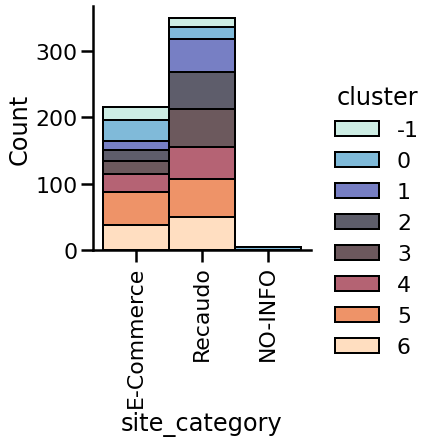

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Merchants, x='site_category', hue='cluster', palette = 'icefire', multiple="stack")
plt.xticks(rotation=90)

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

<Figure size 1080x1080 with 0 Axes>

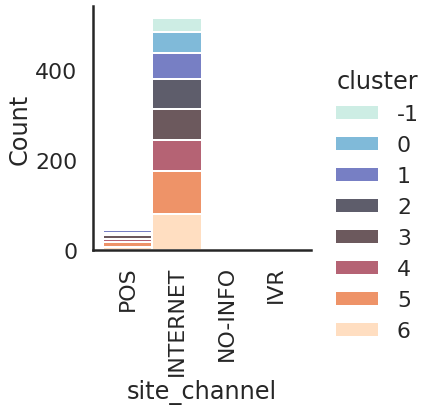

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Merchants, x='site_channel', hue='cluster', multiple='stack', palette = 'icefire')
plt.xticks(rotation=90)


([0, 1, 2], <a list of 3 Text major ticklabel objects>)

<Figure size 1080x1080 with 0 Axes>

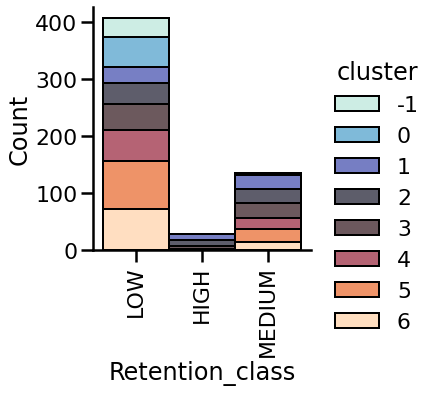

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Merchants, x='Retention_class', hue='cluster', multiple="stack", palette = 'icefire')
plt.xticks(rotation=90)

<Figure size 1800x1800 with 0 Axes>

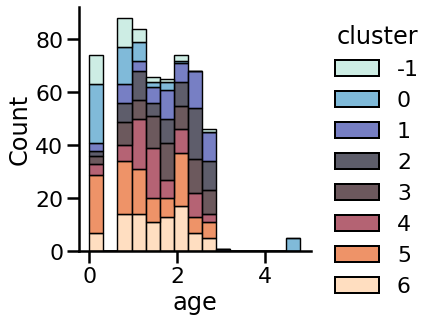

In [ ]:
plt.figure(figsize=(25,25))
g = sns.displot( data=Merchants, x=np.log(Merchants['age'] +1), hue='cluster', multiple="stack", palette = 'icefire')

In [ ]:
Merchants.columns

Index(['Unnamed: 0', 'merchant_id', 'transaction_id', 'Money',
       'isic_division_name', 'merchant_address_city',
       'merchant_classification', 'merchant_enabled', 'site_category',
       'site_channel', 'Ret_February', 'Ret_March', 'Ret_April', 'Ret_May',
       'Ret_June', 'Ret_July', 'Ret_August', 'Ret_September', 'Ret_October',
       'Ret_November', 'Retention_class', 'age', 'cluster'],
      dtype='object')

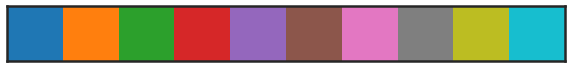

In [ ]:
current_palette = sns.color_palette()
sns.set_style("white")
sns.set_palette("husl")
sns.palplot(current_palette)
plt.show()


In [ ]:
plt.figure(figsize=(15,150))
for i, column in enumerate(Merchants.columns):
  plt.subplot(25, 1, i+1)
  #bd_temp = bd_log[bd_log["isic_section_name"] == i]
  #j = len(bd_temp["isic_division_name"].dropna().unique())
    
  #if j > 1:
  g = sns.displot( data=Merchants, x=column, hue='cluster', palette = 'dark')
  #g.set_title(i)
  plt.title(i)

plt.legend()
plt.show()

In [ ]:
import joypy

#set some display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)#import the csv
df2 = pd.read_csv('C:/Users/mbade/Downloads/datasets-master/mpg_ggplot2.csv')#create a color gradent function to be used in the colormap parameter
def color_gradient(x=0.0, start=(0, 0, 0), stop=(1, 1, 1)):
    r = np.interp(x, [0, 1], [start[0], stop[0]])
    g = np.interp(x, [0, 1], [start[1], stop[1]])
    b = np.interp(x, [0, 1], [start[2], stop[2]])
    return (r, g, b)#show the table
print(df2.head(20))#plot the figure
plt.figure(dpi=380)
fig, axes = joypy.joyplot(df2
                          , column=['hwy', 'cty']
                          , overlap=2.5
                          , by="model"
                          , ylim='own'
                          , x_range=(0,60)
                          , fill=True
                          , figsize=(10,13)
                          , legend=False
                          , xlabels=True
                          , ylabels=True
                          #, color=['#76a5af', '#134f5c']
                          , colormap=lambda x: color_gradient(x, start=(.08, .45, .8)
                                                             ,stop=(.8, .34, .44))
                          , alpha=0.6
                          , linewidth=.5
                          , linecolor='w'
                          #, background='k' # change to 'k' for black background or 'grey' for grey
                          , fade=True)
plt.title('Joy Plot of City and Highway Mileage by Class'
          , fontsize=14
          , color='grey'
          , alpha=1)
plt.rc("font", size=12)
plt.xlabel('MPG', fontsize=14, color='grey', alpha=1)
plt.ylabel('Car Model', fontsize=8, color='grey', alpha=1)
plt.show

## Payers Clusters


In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/payers_cluster.csv'
#FilePath = '/content/drive/My Drive/DS4A-3/reco_prueba/payers_clus.csv'
#FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/payers.csv'
Payers = pd.read_csv(FilePath) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

In [ ]:
Payers.columns

Index(['Unnamed: 0', 'transaction_payer_id', 'Purchases', 'TotalSpent',
       'Money', 'recency', 'frequency', 'transaction_payer_document_type',
       'perc', 'device', 'cluster'],
      dtype='object')

In [ ]:
Payers.tail()

,transaction_payer_id,Purchases,TotalSpent,AvgSpent,FirstPurchase,LastPurchase,recency,frequency,transaction_payer_document_type,ip_location_region_name,ip_location_city,transaction_user_agent
2430944,PPQU1UUX61,2,109300.0,54650.0,2020-07-08,2020-08-22,29.0,22.5,No Info,CO-Bogota D.C.,Bogota,Other
2430945,PJAS6R7AFX,1,80900.0,80900.0,2020-06-27,2020-06-27,85.0,0.0,No Info,CO-Departamento De Tolima,Ibague,Other
2430946,P9AK57IH1E,2,67500.0,33750.0,2020-03-09,2020-09-09,11.0,92.0,No Info,CO-Bogota D.C.,Bogota,Other
2430947,PTP546FBH1,2,57800.0,28900.0,2020-06-27,2020-03-07,197.0,56.0,No Info,CO-Bogota D.C.,Bogota,Other
2430948,P91N8BGGGZ,1,65800.0,65800.0,2020-07-29,2020-07-29,53.0,0.0,No Info,CO-Bogota D.C.,Bogota,Other


In [ ]:
Payers.transaction_user_agent.unique()

array(['Other', 'Windows Chrome', 'iPhone', 'Linux Android Chrome',
       'Windows Firefox', 'Macintosh', 'Linux Other', 'Macintosh Chrome',
       'Windows', 'Macintosh Safari', 'iPad', 'Linux Android'],
      dtype=object)

In [ ]:
Payers.device.unique()

AttributeError: ignored

In [ ]:
Payers.cluster.unique()

array([26, 52, 50,  0, 45, 36, 29,  2,  7,  9, 44, -1, 40, 32, 19,  4, 24,
       51, 46, 11, 20, 48,  6, 42, 12, 18, 27,  1,  5, 28, 38, 49, 23,  3,
       41, 14,  8, 15, 10, 30, 13, 35, 31, 21, 25, 39, 17, 37, 43, 33, 16,
       34, 22, 47])

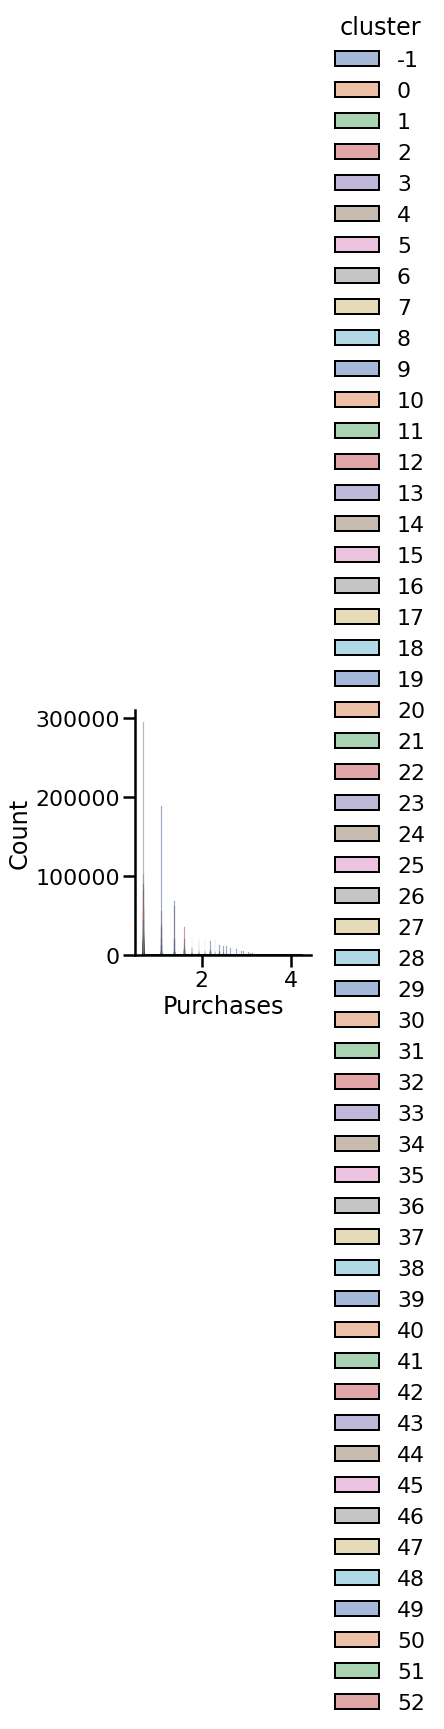

In [ ]:
#plt.figure(figsize=(15,15))
sns.displot( data=Payers, x=np.log(Payers['Purchases'] +1), hue='cluster', palette = 'deep')

<Figure size 1080x1080 with 0 Axes>

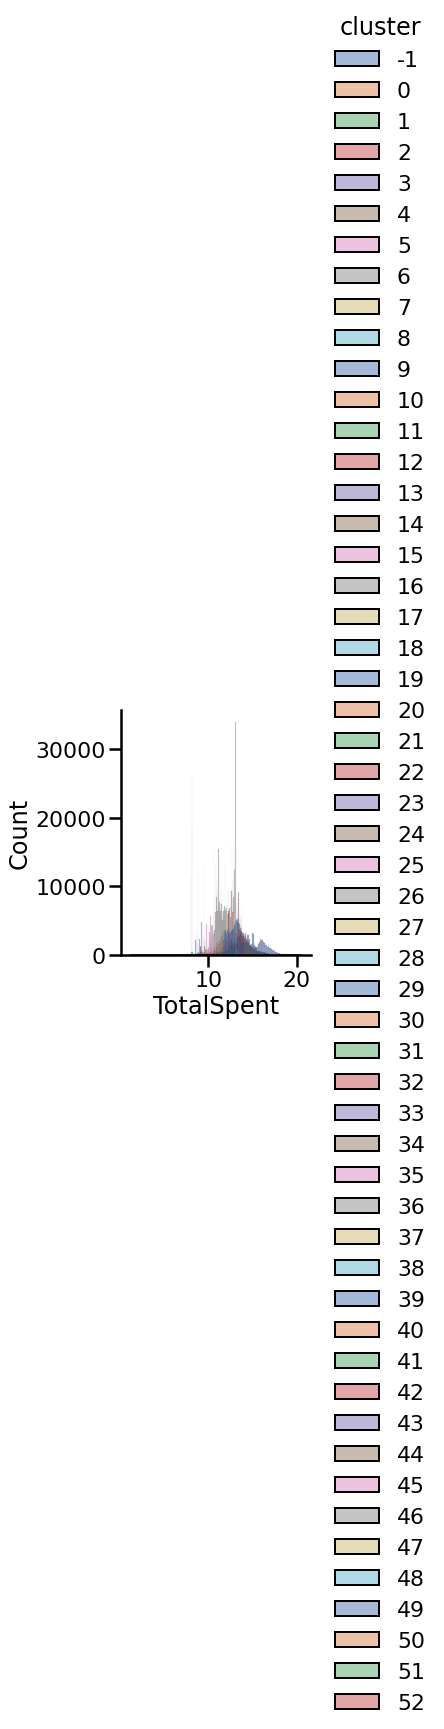

In [ ]:
#plt.figure(figsize=(15,15))
sns.displot( data=Payers, x=np.log(Payers['TotalSpent'] +1), hue='cluster', palette = 'deep')

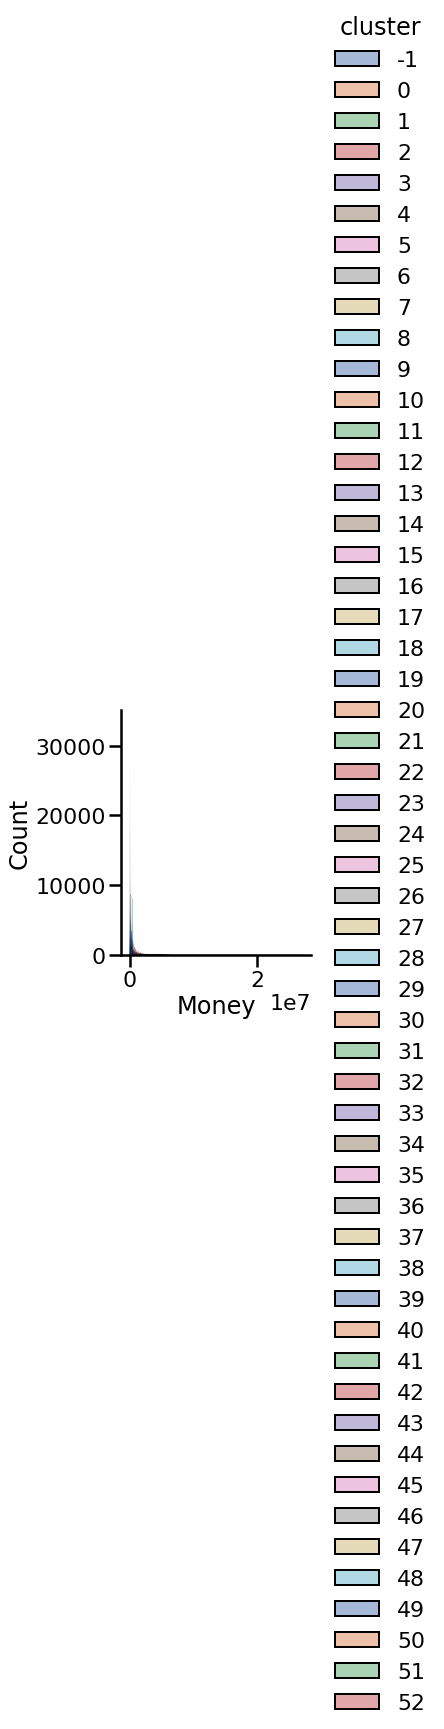

In [ ]:
#plt.figure(figsize=(15,15))
sns.displot( data=Payers, x=np.log(Payers['Money'] +1), hue='cluster', palette = 'deep')

<Figure size 1080x1080 with 0 Axes>

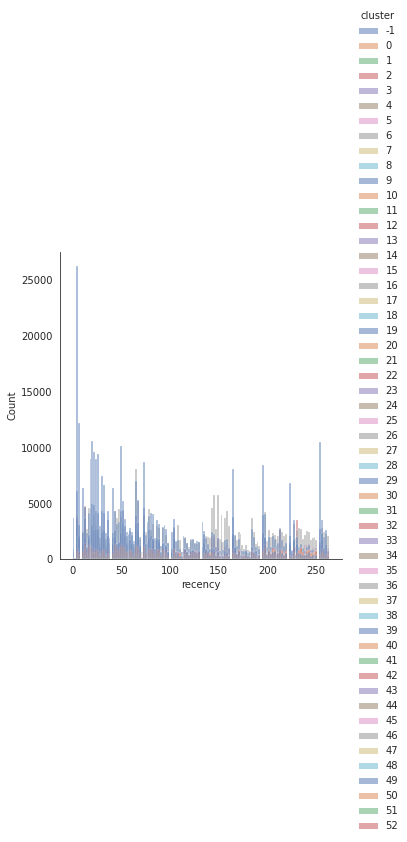

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Payers, x='recency', hue='cluster', palette = 'deep')

<Figure size 1080x1080 with 0 Axes>

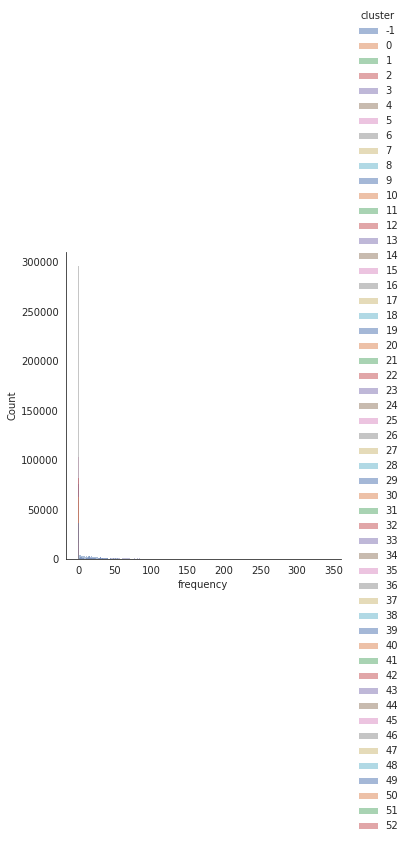

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Payers, x='frequency', hue='cluster', palette = 'deep')

<Figure size 1080x1080 with 0 Axes>

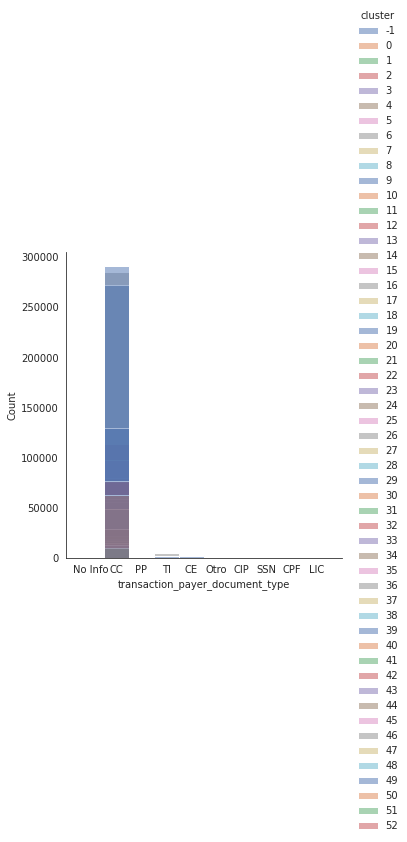

In [ ]:
plt.figure(figsize=(15,15))


sns.displot( data=Payers, x='transaction_payer_document_type', hue='cluster', palette = 'deep')

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Payers, x='perc', hue='cluster', palette = 'deep')

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Payers, x='device', hue='cluster', palette = 'deep')

In [ ]:
FilePath = '/content/drive/My Drive/DS4A-3/Place to pay - DS4A - Databases and Notebooks/payers.csv'
Payers2 = pd.read_csv(FilePath) # just to check schema is as expected. Use sep=',', error_bad_lines=False, encoding='latin1', nrows = 100000

In [ ]:
Payers2.columns

Index(['transaction_payer_id', 'Purchases', 'TotalSpent', 'AvgSpent',
       'FirstPurchase', 'LastPurchase', 'recency', 'frequency',
       'transaction_payer_document_type', 'ip_location_region_name',
       'ip_location_city', 'transaction_user_agent'],
      dtype='object')

In [ ]:
Payers2.transaction_user_agent.unique()

array(['Other', 'Windows Chrome', 'iPhone', 'Linux Android Chrome',
       'Windows Firefox', 'Macintosh', 'Linux Other', 'Macintosh Chrome',
       'Windows', 'Macintosh Safari', 'iPad', 'Linux Android'],
      dtype=object)

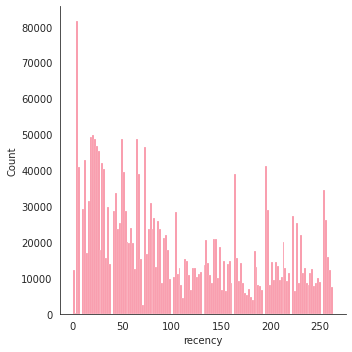

In [ ]:
sns.displot(data=Payers2, x='recency', palette = 'deep')

In [ ]:
Payers2['clusters1'] = 

In [ ]:
plt.figure(figsize=(15,15))
sns.displot( data=Payers2, x='Purchases', hue='cluster', palette = 'deep')